[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier-Stokes
=====
## <font color='blue'> 나비어-스톡스 의 12 단계
***

Up to now, all of our work has been in one spatial dimension (Steps [1](./01_Step_1.ipynb) to [4](./05_Step_4.ipynb)). We can learn a lot in just 1D, but let's grow up to flatland: two dimensions. 
<font color='red'>지금까지 해왔던것은 모두 하나의 공간 차원에서 다루었습니다. ([1](./01_Step_1.ipynb) ~ [4](./05_Step_4.ipynb) 단계). 1차원에서 배울것이 많지만, 2차원을 통해 더 깊게 배워봅시다.</font>

In the following exercises, you will extend the first four steps to 2D. To extend the 1D finite-difference formulas to partial derivatives in 2D or 3D, just apply the definition: a partial derivative with respect to $x$ is the variation in the $x$ direction *at constant* $y$.
<font color='red'>다음 연습에서는 처음 네단계를 2차원으로 확장합니다. 1차원 유한 차분 공식을 2차원 또는 3차원의 부분 미분 값으로 확장하려면,"$x$에 대한 편미 함수는 상수 $y$ 에서 $x$ 방향의 변화이다", 정의를 적용하면됩니다. </font>

In 2D space, a rectangular (uniform) grid is defined by the points with coordinates:
<font color='red'>2차원 공간에서 직사각형(균일한) 격자는 좌표가있는 점으로 정의됩니다.</font>

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Now, define $u_{i,j} = u(x_i,y_j)$ and apply the finite-difference formulas on either variable $x,y$ *acting separately* on the $i$ and $j$ indices. All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{i,j}$.
<font color='red'>이제 $u_{i,j} = u(x_i,y_j)$ 를 정의하고 변수 $x,y$ 에 유한 차분 공식을 적용하여 $i$ 및 $j$ 인덱스에서 별도로 작용합니다. 모든 미분은 $u_{i,j}$ 주변의 메쉬 포인트 값의 2차원 테일러 확장을 기반으로합니다.</font>

Hence, for a first-order partial derivative in the $x$-direction, a finite-difference formula is:
<font color='red'>따라서 $x$ 방향의 1차 편미분에 대해 유한 차분 공식은 다음과 같습니다.</font>

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x)$$

and similarly in the $y$ direction. Thus, we can write backward-difference, forward-difference or central-difference formulas for Steps 5 to 12. Let's get started!
<font color='red'>$y$ 방향에서도 마찬가지입니다. 따라서 5~12 단계까지 후방차분, 전방차분 또는 중앙차분(**central-difference**) 공식을 사용할수 있습니다. 시작해봅시다!</font>

Step 5: 2-D Linear Convection
----
## <font color='blue'>5단계: 2차원 선형 대류
***

The PDE governing 2-D Linear Convection is written as
<font color='red'>2차원 선형 대류의 PDE는 다음과 같이 쓰여집니다.</font>

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

This is the exact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.
<font color='red'>이것은 1차원 선형 대류와 정확히 같은 형태입니다만, 앞으로 고려해야하는 두개의 공간적 차원을 갖게된다는 점은 제외입니다.</font>

Again, the timestep will be discretized as a forward difference and both spatial steps will be discretized as backward differences.
<font color='red'>다시말해, 타임 스텝은 전방차분, 두 공간 단계는 후방차분으로 이산화됩니다.</font>

With 1-D implementations, we used $i$ subscripts to denote movement in space (e.g. $u_{i}^n-u_{i-1}^n$).  Now that we have two dimensions to account for, we need to add a second subscript, $j$, to account for all the information in the regime.
<font color='red'>1차원 구현에서는 공간에서의 이동을 나타내기 위해 첨자(**subscrip**t) $i$를 사용했습니다 (예:$u_{i}^n-u_{i-1}^n$). 이제는 두 가지 차원이 있으므로, 레짐(**regime**)의 모든 정보를 설명하기 위해 두번째 첨자 $j$ 를 추가해야 합니다.
</font>

Here, we'll again use $i$ as the index for our $x$ values, and we'll add the $j$ subscript to track our $y$ values.
<font color='red'>여기서 $x$ 값을 위해 $i$ 를 인덱스로 다시 지정하고 $y$ 값을 track 하기 위해 $j$ 인덱스를 추가 할 할것입니다.</font>

With that in mind, our discretization of the PDE should be relatively straightforward.
<font color='red'>이를 염두에두고 우리 PDE의 이산화는 비교적 간단해야합니다.</font>

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

As before, solve for the only unknown:
<font color='red'>이전과 마찬가지로 미지수를 중점에두고 풀어보세요.</font>

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

We will solve this equation with the following initial conditions:
<font color='red'>이 방정식은 다음과 같은 초기 조건으로 풉니다. :</font>

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:
<font color='red'>그리고 경계 조건입니다.</font>

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

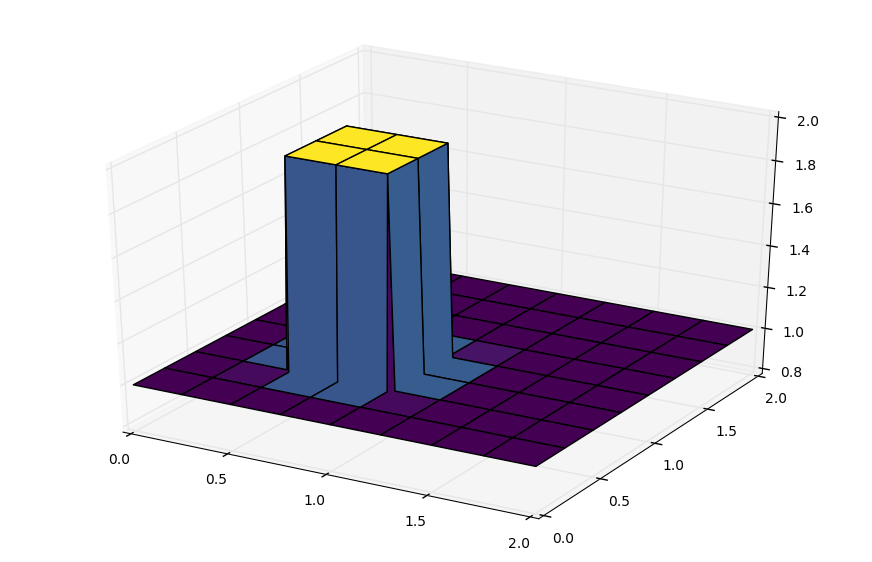

In [2]:
from mpl_toolkits.mplot3d import Axes3D    ##New Library required for projected 3d plots

import numpy
from matplotlib import pyplot, cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

###variable declarations
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
un = numpy.ones((ny, nx)) ##

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)





### 3D Plotting Notes
#### <font color='blue'>3차원 플로팅 메모</font>

To plot a projected 3D result, make sure that you have added the Axes3D library.
<font color='red'>결과물을 3차원으로 플로팅하기 위해서는 Axes3D 라이브러리를 꼭 추가하세요.</font>

    from mpl_toolkits.mplot3d import Axes3D

The actual plotting commands are a little more involved than with simple 2d plots.
<font color='red'>실질적인 플로팅 명령어는 2차원 플로팅보다 조금더 복잡합니다.</font>

```python
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:])
```

The first line here is initializing a figure window.  The **figsize** and **dpi** commands are optional and simply specify the size and resolution of the figure being produced.  You may omit them, but you will still require the 
<font color='red'>여기서 첫째 줄은 그림창을 초기화하는 것입니다. **figsize** 및 **dpi** 명령은 선택 사항이며 그림의 크기와 해상도를 지정합니다. 생략 할 수는 있지만 여전히 아래의 명령어는 필요합니다.</font>
    
    fig = pyplot.figure()

The next line assigns the plot window the axes label 'ax' and also specifies that it will be a 3d projection plot.  The final line uses the command
<font color='red'>다음 줄은 플롯 창에 축 레이블 'ax'를 지정하고 3차원 플롯으로 지정합니다. 다음과 같은 명령어를 입력합니다.</font>
    
    plot_surface()

which is equivalent to the regular plot command, but it takes a grid of X and Y values for the data point positions.  
<font color='red'>이는 일반적인 플롯 명령과 동일하지만 데이터 포인트 위치에 대한 X 및 Y 값의 격자를 사용합니다.</font>

##### Note
##### <font color='blue'></font>


The `X` and `Y` values that you pass to `plot_surface` are not the 1-D vectors `x` and `y`.  In order to use matplotlibs 3D plotting functions, you need to generate a grid of `x, y` values which correspond to each coordinate in the plotting frame.  This coordinate grid is generated using the numpy function `meshgrid`.
<font color='red'>`plot_surface` 에 전달하는 `X` 및 `Y` 값은 1차원 벡터, `x` 및 `y` 가 아닙니다. matplotlibs 3차원 플로팅 함수를 사용하려면 플로팅 프레임의 각 좌표에 해당하는 `x, y` 값의 격자를 생성해야합니다. 이 좌표 격자는 numpy 함수 meshgrid를 사용하여 생성됩니다.
</font>

    X, Y = numpy.meshgrid(x, y)

 

### Iterating in two dimensions
#### <font color='blue'>2차원에서 반복하기

To evaluate the wave in two dimensions requires the use of several nested for-loops to cover all of the `i`'s and `j`'s.  Since Python is not a compiled language there can be noticeable slowdowns in the execution of code with multiple for-loops.  First try evaluating the 2D convection code and see what results it produces. 
<font color='red'>2차원에서 웨이브를 평가하려면 `i` 와 `j` 를 모두 커버하기 위해 중첩된 몇개의 for-loops 를 사용해야합니다. Python은 컴파일(**compile**)된 언어가 아니기에 여러 for-loops 를 포함한 코드는 실행이 많이 느려질 수 있습니다. 먼저 2차원 대류 코드를 평가하고 어떤 결과가 일어나는지 확인해보세요.


Wall time: 2.02 s


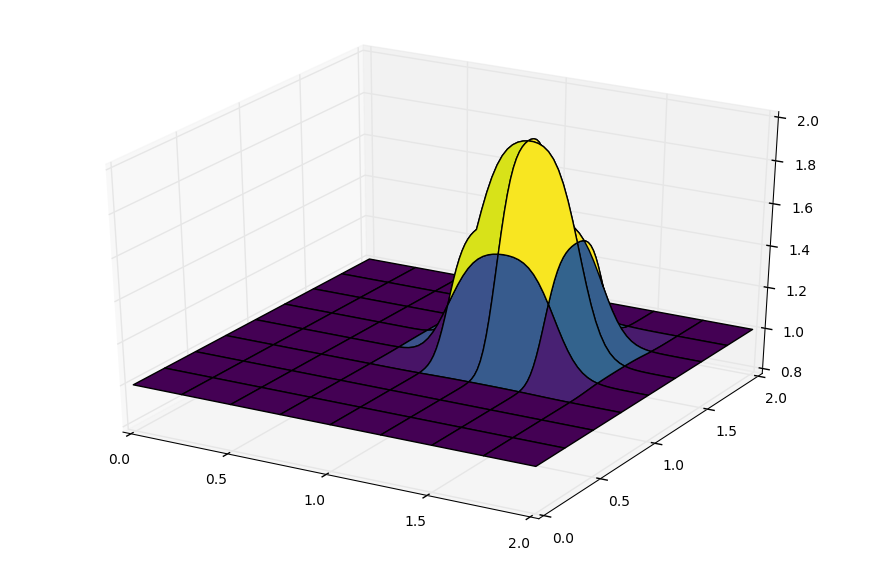

In [7]:
%%time
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                  (c * dt / dy * (un[j, i] - un[j - 1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

Array Operations
----------------
### <font color='blue'>배열 연산</font>

Here the same 2D convection code is implemented, but instead of using nested for-loops, the same calculations are evaluated using array operations.  
<font color='red'>여기서 동일한 2차원 대류 코드가 구현되지만 중첩된 for-loops를 사용하는 대신 배열 연산을 사용하여 동일한 계산이 평가됩니다.</font>

Wall time: 189 ms


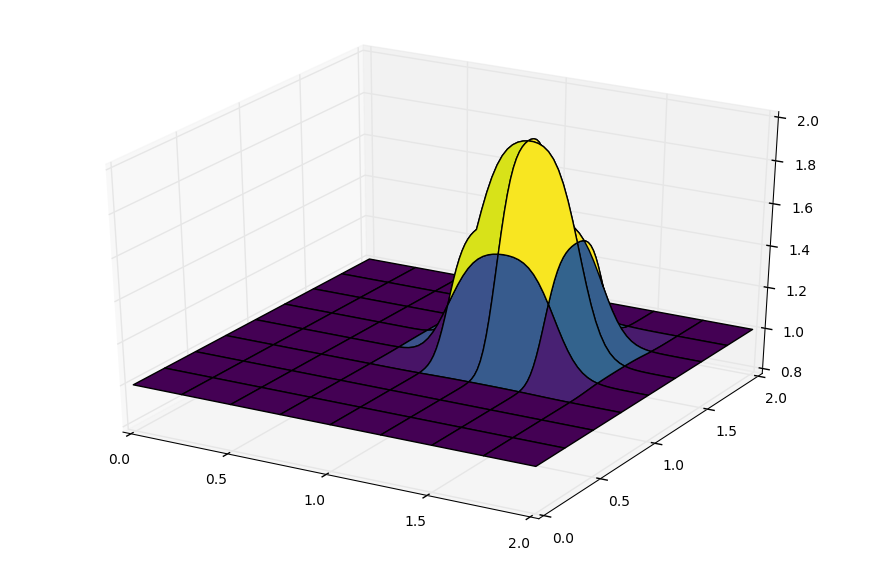

In [6]:
%%time
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

    

## Learn More
### <font color='blue'> 더 알아보기

The video lesson that walks you through the details for Step 5 (and onwards to Step 8) is **Video Lesson 6** on You Tube:
<font color='red'>5단계(8단계까지 포함)의 자세한 동영상 강의는 유투브에서 **Video Lesson 6** 입니다.

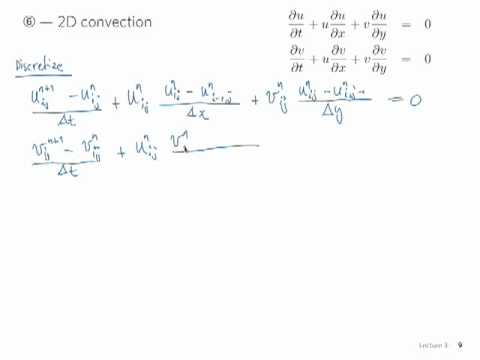

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [5]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)